In [1]:
import os ,sys 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from operator import itemgetter
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,classification_report, confusion_matrix,accuracy_score,matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.svm import SVC, SVR
from scipy.stats import zscore
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,train_test_split
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_predict , cross_val_score ,KFold
import math
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
#get_ipython().magic(u'matplotlib inline')


In [2]:
np.random.seed(seed = 101)

In [3]:
df = pd.read_csv("SubCh1_TrainingData.csv")

In [4]:
df.head()

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,0.008286,-0.959492,0.206468,-0.443936,0.453030,...,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528,2.177
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,...,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568,2.177
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,0.039480,-1.291371,-0.946661,-0.538092,-1.778501,...,1.411557,-5.500522,-1.764229,-1.947208,-5.331037,-0.814417,-2.141285,-3.922684,-2.495169,2.177
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,0.125177,-1.462758,-1.888105,-0.828352,-1.410803,...,-0.659519,-5.011207,-0.559471,-2.266763,-5.289318,-2.949869,-2.206432,-4.324299,-1.735312,2.177
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,1.354956,-2.139128,-0.541696,-1.481881,-0.735798,...,-1.687048,-4.773306,-0.048847,-2.023727,-4.398358,-3.080500,-0.566545,-4.798190,-0.821690,2.177


In [5]:
df.shape

(272, 5546)

In [6]:
# df.info(verbose=True)

In [7]:
df.describe()

,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,MAL10.1139073.1139243....kr,MAL10.258733.258825.b...r..,MAL10.271753.271892.bcgkrvy,MAL10.273174.273239.....r..,MAL10.416036.416142...g....,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,...,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,0.125273,-1.512177,-1.116548,-0.936387,-0.253318,0.298666,1.504544,-0.025641,1.373421,0.291101,...,-0.009068,-3.610517,-0.988702,-1.921088,-4.935438,-2.309423,-1.768981,-4.462729,-1.746997,1.570315
std,0.542060,0.502683,0.643688,0.464550,1.107896,0.425972,0.883458,1.046012,0.761668,0.553439,...,1.031158,1.852142,1.024552,0.572710,1.018966,1.126079,0.715564,0.830355,0.800431,0.534407
min,-1.250413,-2.535058,-2.791146,-1.813041,-2.925634,-0.694826,-0.857090,-2.299513,-0.627621,-1.758676,...,-2.721814,-8.904293,-3.140255,-3.377862,-7.721518,-4.328654,-3.875441,-6.375202,-3.707360,0.693300
25%,-0.233872,-1.863514,-1.601765,-1.276685,-1.143323,-0.019275,0.933157,-0.711849,0.842813,-0.070616,...,-0.705137,-4.824156,-1.764306,-2.278142,-5.672801,-3.134324,-2.291835,-5.112061,-2.294710,1.348000
50%,0.130822,-1.551020,-1.150618,-0.975024,-0.137613,0.304761,1.561292,-0.022275,1.382920,0.321084,...,0.047402,-3.774768,-0.973219,-1.974079,-5.013212,-2.525829,-1.752801,-4.526027,-1.822472,1.582000
75%,0.471552,-1.244585,-0.655040,-0.654516,0.642300,0.616233,2.141165,0.663110,1.873848,0.675317,...,0.643709,-2.358820,-0.308922,-1.611579,-4.140006,-1.719090,-1.228009,-3.925279,-1.333393,1.820000
max,1.530355,0.893645,0.588564,0.868970,2.331929,1.371144,4.234103,3.479097,3.899651,1.546084,...,2.392878,0.946101,2.161030,0.411185,-1.229299,2.130280,-0.060964,-1.560654,1.015633,3.460000


In [8]:
df.Timepoint.unique()

array(['24HR', '6HR'], dtype=object)

In [9]:
df["BioRep"].unique()

array(['BRep1', 'BRep2', 'BRep3', 'BRep4', 'BRep5', 'BRep6', 'BRep7',
       'BRep8'], dtype=object)

In [10]:
df["Isolate"].unique()

array(['isolate_01', 'isolate_02', 'isolate_03', 'isolate_04',
       'isolate_05', 'isolate_06', 'isolate_07', 'isolate_08',
       'isolate_09', 'isolate_10', 'isolate_11', 'isolate_12',
       'isolate_13', 'isolate_14', 'isolate_15', 'isolate_16',
       'isolate_17', 'isolate_18', 'isolate_19', 'isolate_20',
       'isolate_21', 'isolate_22', 'isolate_23', 'isolate_24',
       'isolate_25', 'isolate_26', 'isolate_27', 'isolate_28',
       'isolate_29', 'isolate_30'], dtype=object)

In [11]:
df["Treatment"].unique()

array(['DHA', 'UT'], dtype=object)

In [12]:
df2 = df.drop(["Treatment","Timepoint","BioRep","Isolate"],axis=1)

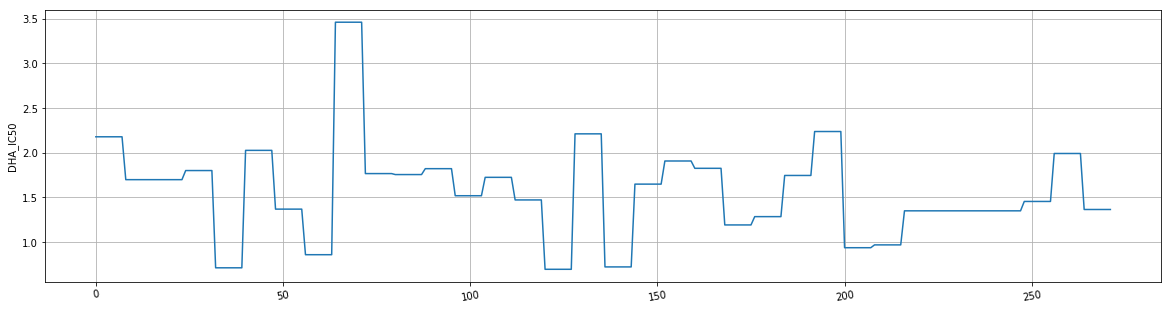

In [13]:
df2['DHA_IC50'].plot(grid=True,rot=10,figsize=(20,5))
plt.ylabel("DHA_IC50")
plt.savefig ("DHA_IC50.png")

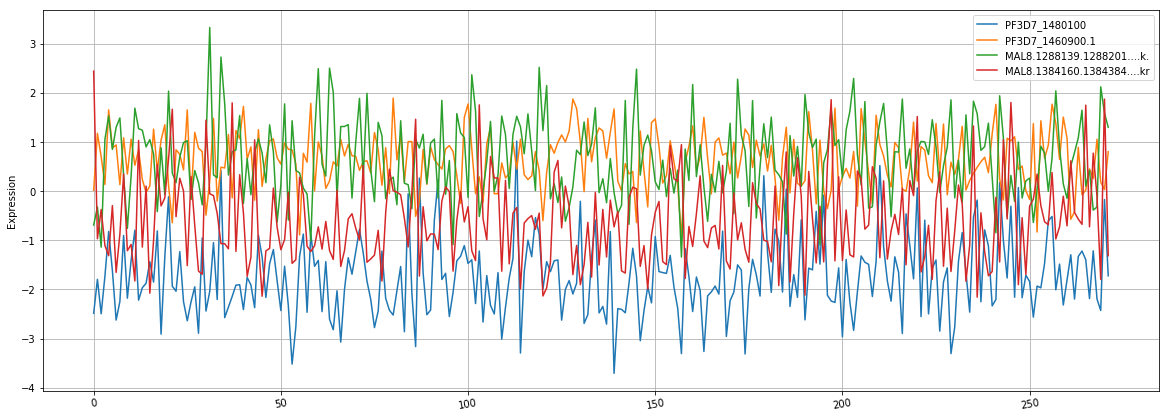

In [14]:
df2[["PF3D7_1480100","PF3D7_1460900.1",
"MAL8.1288139.1288201....k." ,     
"MAL8.1384160.1384384....kr"  ,
]].plot(grid=True,rot=10,figsize=(20,7))
plt.ylabel("Expression")
plt.savefig ("sample.eps",format='eps')

In [15]:
df.set_index("Sample_Name",inplace=True)

In [16]:
# DHA_IC50

In [17]:
df_edit = pd.concat( [df, pd.get_dummies(df["Treatment"]),pd.get_dummies( df["Timepoint"])]
                         ,axis=1,sort=True )

In [18]:
df_edit= df_edit.drop(["Treatment","Timepoint","BioRep","Isolate"],axis=1)

In [19]:
df = df_edit

In [20]:
y = df["DHA_IC50"]

In [21]:
X = df.drop("DHA_IC50",axis=1)

In [22]:
# print (df["Isolate"].unique())

In [23]:
# print (df["Timepoint"].unique())

In [24]:
# print (df["Treatment"].unique())

In [25]:
# print (df ["BioRep"].unique())

In [26]:
# my_dict_df = { num:m for num,m in enumerate (df["Isolate"].unique() )}

In [27]:
# my_dict_df

In [28]:
df_test = pd.read_csv("SubCh1_TestData.csv")


In [29]:
# my_dict = { num:m for num,m in enumerate (df_test["Isolate"].unique() )}
# df_test["DHA_IC50"]
    

In [30]:
# my_dict
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled , y, test_size=0.33, random_state=101)

/Users/barradd/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/barradd/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [31]:
df_test_edit = pd.concat( [df_test, pd.get_dummies(df_test["Treatment"]),pd.get_dummies( df_test["Timepoint"])]
                         ,axis=1,sort=True )

In [32]:
df_test_edit=df_test_edit.drop(["Treatment","Timepoint","BioRep","Isolate"],axis=1)

In [33]:
df_test = df_test_edit

In [34]:
# df_test["DHA_IC50"]

In [35]:
df_test.set_index("Sample_Names",inplace=True)
# X_test = df_test.drop("DHA_IC50",axis=1)
# y_test = df_test["DHA_IC50"]

In [36]:
# print (df_test ["BioRep"].unique())
# my_df = df[ (df["Isolate"] == "isolate_01") & (df["Timepoint"] == "24HR") & (df["Treatment"] == 'DHA') ].iloc[:, 2:17]

In [37]:
# for m in df_test.columns:
#     print (m)

In [38]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2000, stop = 4000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [39]:
rfc = RandomForestRegressor(bootstrap=False,
                            n_jobs=-1,
                            max_features="sqrt",
                            min_samples_split=10,
                            max_depth=30,
                            n_estimators=6333,
                            min_samples_leaf=8)

In [40]:
cv = KFold(5, shuffle=True)

In [41]:
rf_random = RandomizedSearchCV(estimator = rfc, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = cv, verbose=2, random_state=101, n_jobs = -1)

In [40]:
# rf_random.fit(X_train,y_train )
rfc.fit(X_train,y_train )

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=6333, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
# print (rf_random.best_params_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
# y_pred=rf_random.predict(X_test)

In [ ]:
# print (classification_report(y_test, y_pred))

In [ ]:
# print ("MCC %f"%(matthews_corrcoef(y_test, y_pred)))
# print ("Accuracy %f"%(accuracy_score(y_test, y_pred)))

In [44]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [ ]:
# base_model = RandomForestRegressor(n_estimators = 1000, random_state = 101)
# rfc.fit(X_train, y_train)


In [45]:
base_accuracy = evaluate(rfc, X_test, y_test)

Model Performance
Average Error: 0.3899 degrees.
Accuracy = 69.59%.


In [46]:
predictions = rfc.predict(X_test)

In [47]:
print ("R^2:",r2_score(y_test, predictions))
print ("MAE:",mean_absolute_error(y_test, predictions))
print ("MSE:",mean_squared_error(y_test, predictions))

('R^2:', -0.11381140766342424)
('MAE:', 0.38993839476386005)
('MSE:', 0.2745633193166076)


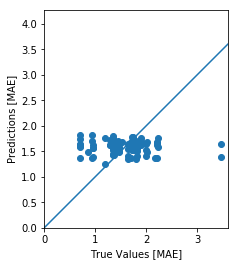

In [48]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values [MAE]')
plt.ylabel('Predictions [MAE]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.savefig("MAE_scatter_RFR.eps",format="eps")
plt.show()

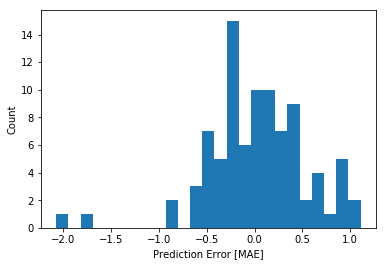

In [49]:
error = predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MAE]")
_ = plt.ylabel("Count")
plt.savefig("MAE_hist_RFR.eps",format="eps")
plt.show()

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test )


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [41]:
d = { 'Features':X.columns, 'Importances':rfc.feature_importances_}
df_features = pd.DataFrame(data=d)

In [42]:
# X_test_scaled
df_features.sort_values('Importances',inplace=True,ascending=False)

In [43]:
df_features.head(n=10)

,Features,Importances
5003,PF3D7_1426400,0.005410
1836,PF3D7_0725700,0.004556
2676,PF3D7_1007100,0.003991
2943,PF3D7_1034000,0.003843
2525,PF3D7_0929800,0.003709
3817,PF3D7_1232900,0.003404
1592,PF3D7_0632700,0.003353
3039,PF3D7_1104500,0.003207
2202,PF3D7_0830700,0.003007
1022,PF3D7_0507000,0.002792


In [ ]:
# hist = pd.DataFrame(history.history)

In [44]:
df_features.to_csv("features_importances_RFC_subCh1.csv")

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(rfc.estimators_[5], out_file='tree.dot', feature_names=X.columns,

                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree_01.png', '-Gdpi=600'])

In [ ]:
from IPython.display import Image
Image(filename = 'tree_01.png')

In [ ]:
export_graphviz(rfc.estimators_[1000], out_file='tree.dot', feature_names=X.columns,

                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree_02.png', '-Gdpi=600'])

In [ ]:
Image(filename = 'tree_02.png')